# Pymaceuticals Data Analysis Observations
 - Of the 10 different treatments attempted, only two drugs were successful in reducing tumor volume - Ramicane and Capomulin. They produced a 22.3% and a 19.5% decrease in tumor volume respectively.
 - For all 10 treatments, the number of metastic sites increased over time. The smallest amount of growth was associated with Capomulin and Ramicane. 
 - Groups treated with Capomulin and Ramicane treatments had the highest survival rates - above 80%.
 - Ketapril appears to be the least effective treatment with a low survivial rate and an exceedingly high growth in tumor volume (57%).

# Preliminaries

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)
clinical_trial_df = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
mouse_drug_trials = mouse_drug_df.merge(clinical_trial_df, on='Mouse ID')

# Rearrange the columns so that 'Drug' is last
mouse_drug_trials = mouse_drug_trials.reindex_axis(['Mouse ID',
                                                    'Timepoint',
                                                    'Tumor Volume (mm3)',
                                                    'Metastatic Sites',
                                                    'Drug',
                                                   ], axis=1)

# Clean up data - remove any potential null entries
mouse_drug_trials = mouse_drug_trials.dropna()

# Display the data table for preview
mouse_drug_trials.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


### Define a Function to Assist in Plotting Drug Trial Data
#### Function parameters
 - *data_df* is a DataFrame of statistics to be plotted 
 
 
 - _labels_ is a dictionary with the following key, value pairs
     - title: " "
     - xlabel: " "
     - ylabel: " "
     
     
 - _info_ identifies the portion of clinical trial data to be examined 
     - e.g info = 'Tumor Volume (mm3)' or info = 'Metastatic Sites' etc.
     
     
 - _err_ is a flag that defaults to True
     - if True, include standard error, if False, no standard error
     
     
 - *stderr_df* is a DataFrame of standard errors - it is optional

In [4]:
def plot_clinical_trials(data_df, labels, info, err=True,stderr_df=0):
    # Build a list of all drugs used in the clinical trials
    drugs = mouse_drug_trials['Drug'].unique().tolist()
    
    # Build an x_axis
    x_axis = np.arange(0,len(mouse_drug_trials['Timepoint'].unique()))
    
    # Build a list of labels for the x_axis
    x_label = mouse_drug_trials['Timepoint'].unique().tolist()
    
    # LINE MARKERS
    ### Build a list of markers
    markers = ['o', 'v', '<', 's', 'p', 'P', '*', 'x', 'X', 'D']
    
    ### store the first marker index in a variable
    m_idx = 0
    
    # Plot a line for every drug in 'drugs'
    plt.rcParams['figure.figsize'] = [30,20]
    for drug in drugs:
        plot_name = f"{drug},"
        y_axis = data_df[info][drug]
        
        # Check to see whether plt.plot() or plt.errorbar() needs to be used
        if err == True:
            y_error = stderr_df[info][drug]
            plot_name = plt.errorbar(x_axis, y_axis, yerr=y_error, label=drug, \
                                     ls='--', marker=markers[m_idx], ms=15)
        else:
            plot_name = plt.plot(x_axis, y_axis, label=drug, \
                                 ls='--', marker=markers[m_idx], ms=15)
        
        # Update marker index
        m_idx += 1
        
    # Turn grid on 
    plt.grid()
    
    # Add appropriate labels to the x_ticks
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, x_label, fontsize=20)
    
    # Format yticks - enlarge fontsize
    yticks = plt.yticks()
    y_label = yticks[0].tolist()
    tick_locations = [value for value in y_label]
    plt.yticks(tick_locations, y_label, fontsize=20)
    
    # Add title, label, and legend
    plt.title(labels['title'], fontweight='bold', fontsize=28)
    plt.xlabel(labels['xlabel'], fontsize=24)
    plt.ylabel(labels['ylabel'], fontsize=24)
    plt.legend(loc='best', fontsize=20)

## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_timepoint_group = mouse_drug_trials.groupby(['Drug','Timepoint'])
mean_tumor_vol_data = drug_timepoint_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol_data)

# Preview DataFrame
mean_tumor_vol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumor_vol_data = drug_timepoint_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
stderr_tumor_vol_df = pd.DataFrame(stderr_tumor_vol_data)

# Preview DataFrame
stderr_tumor_vol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_df = mean_tumor_vol_df.unstack(level=0)
stderr_tumor_vol_df = stderr_tumor_vol_df.unstack(level=0)

# Preview that Reformatting worked - mean
mean_tumor_vol_df.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [8]:
# Preview that Reformatting worked - standard error
stderr_tumor_vol_df.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

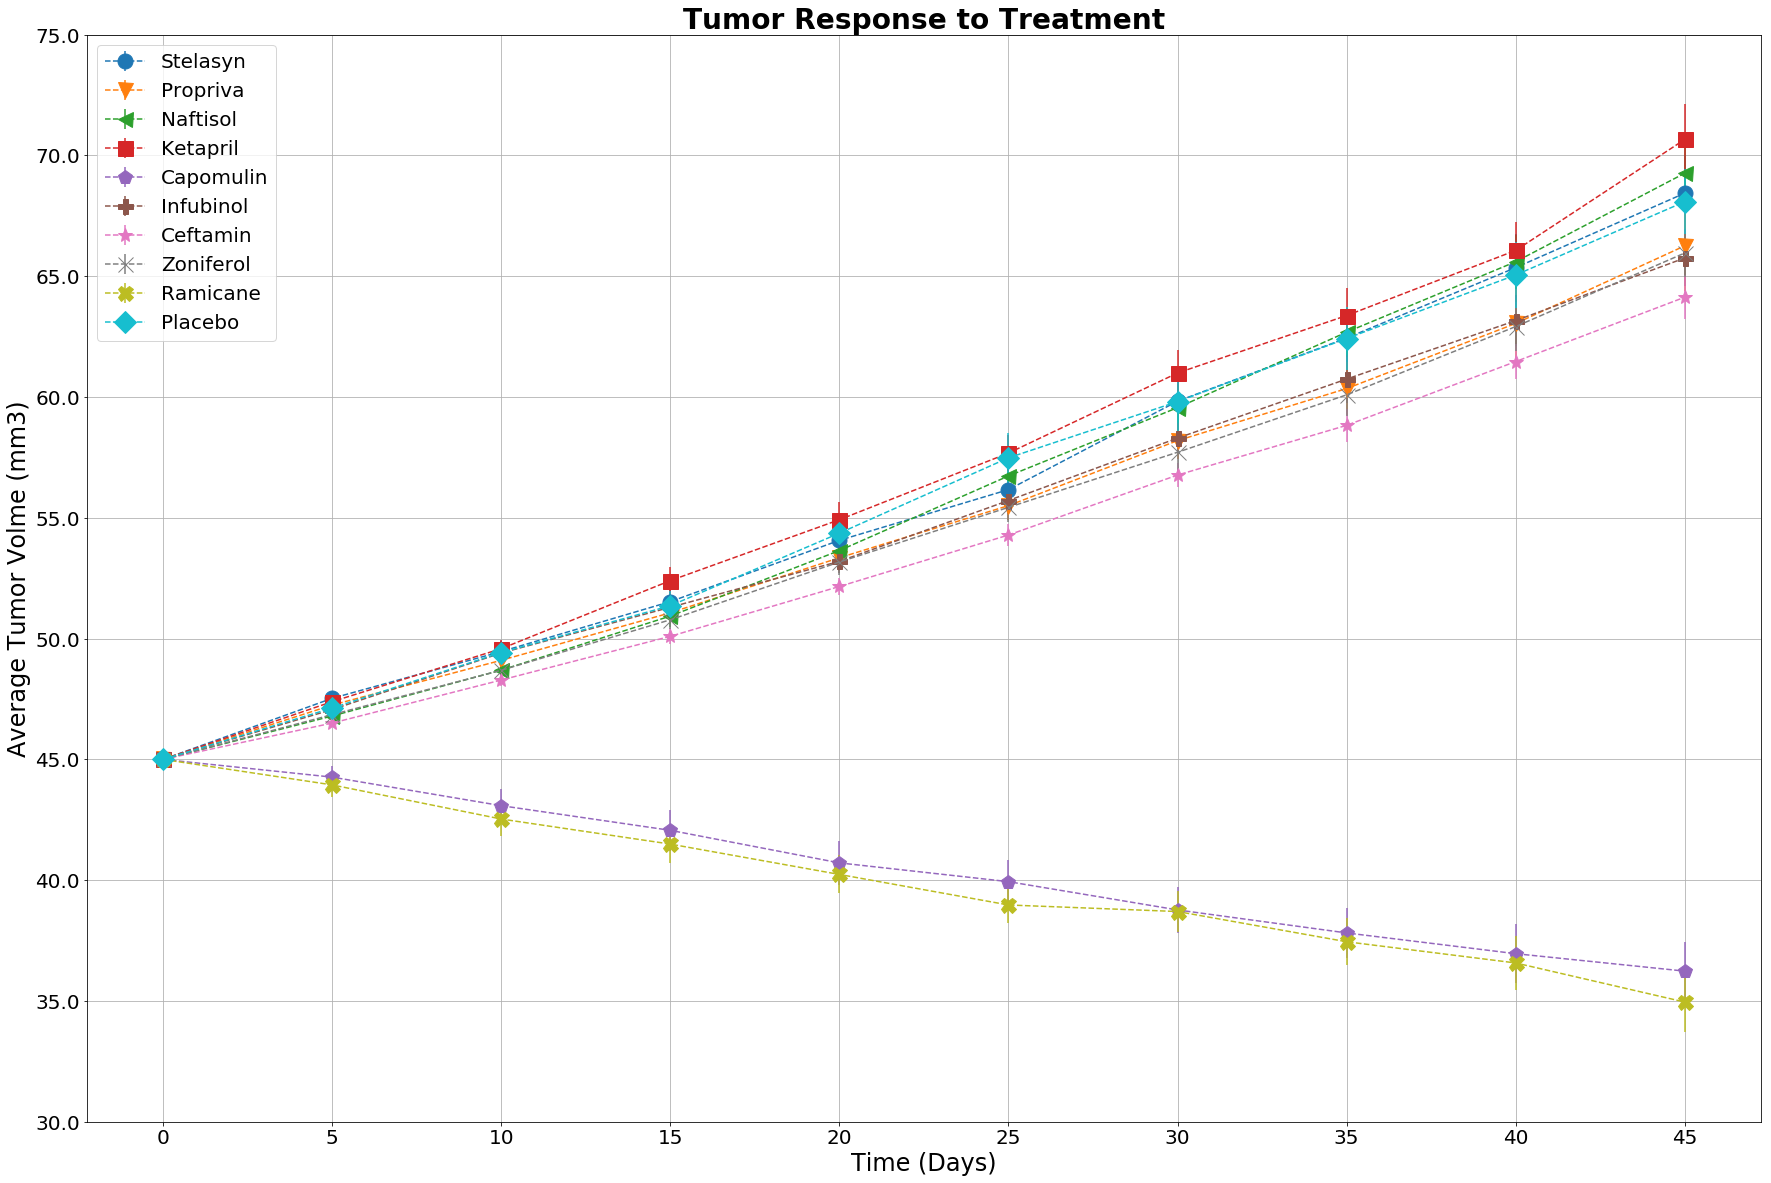

In [9]:
# Generate two plots with error bars - each summarizing half of the trials
# This is done to keep the plots from becoming cluttered with too much info

### Title and labels
labels= {'title': 'Tumor Response to Treatment',
         'xlabel': 'Time (Days)',
         'ylabel': 'Average Tumor Volme (mm3)',
        }

plot_clinical_trials(mean_tumor_vol_df, labels, 'Tumor Volume (mm3)', \
                     stderr_df=stderr_tumor_vol_df)

# Save the Figure
plt.savefig("Images/tumor_vol_results.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metsite_data = drug_timepoint_group['Metastatic Sites'].mean()

# Convert to DataFrame
mean_metsite_df = pd.DataFrame(mean_metsite_data)

# Preview DataFrame
mean_metsite_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_metsite_data = drug_timepoint_group['Metastatic Sites'].sem()

# Convert to DataFrame
stderr_metsite_df = pd.DataFrame(stderr_metsite_data)

# Preview DataFrame
stderr_metsite_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mean_metsite_df = mean_metsite_df.unstack(level=0)
stderr_metsite_df = stderr_metsite_df.unstack(level=0)

# Preview that Reformatting worked - mean
mean_metsite_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [13]:
# Preview that Reformatting worked - standard error
stderr_metsite_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

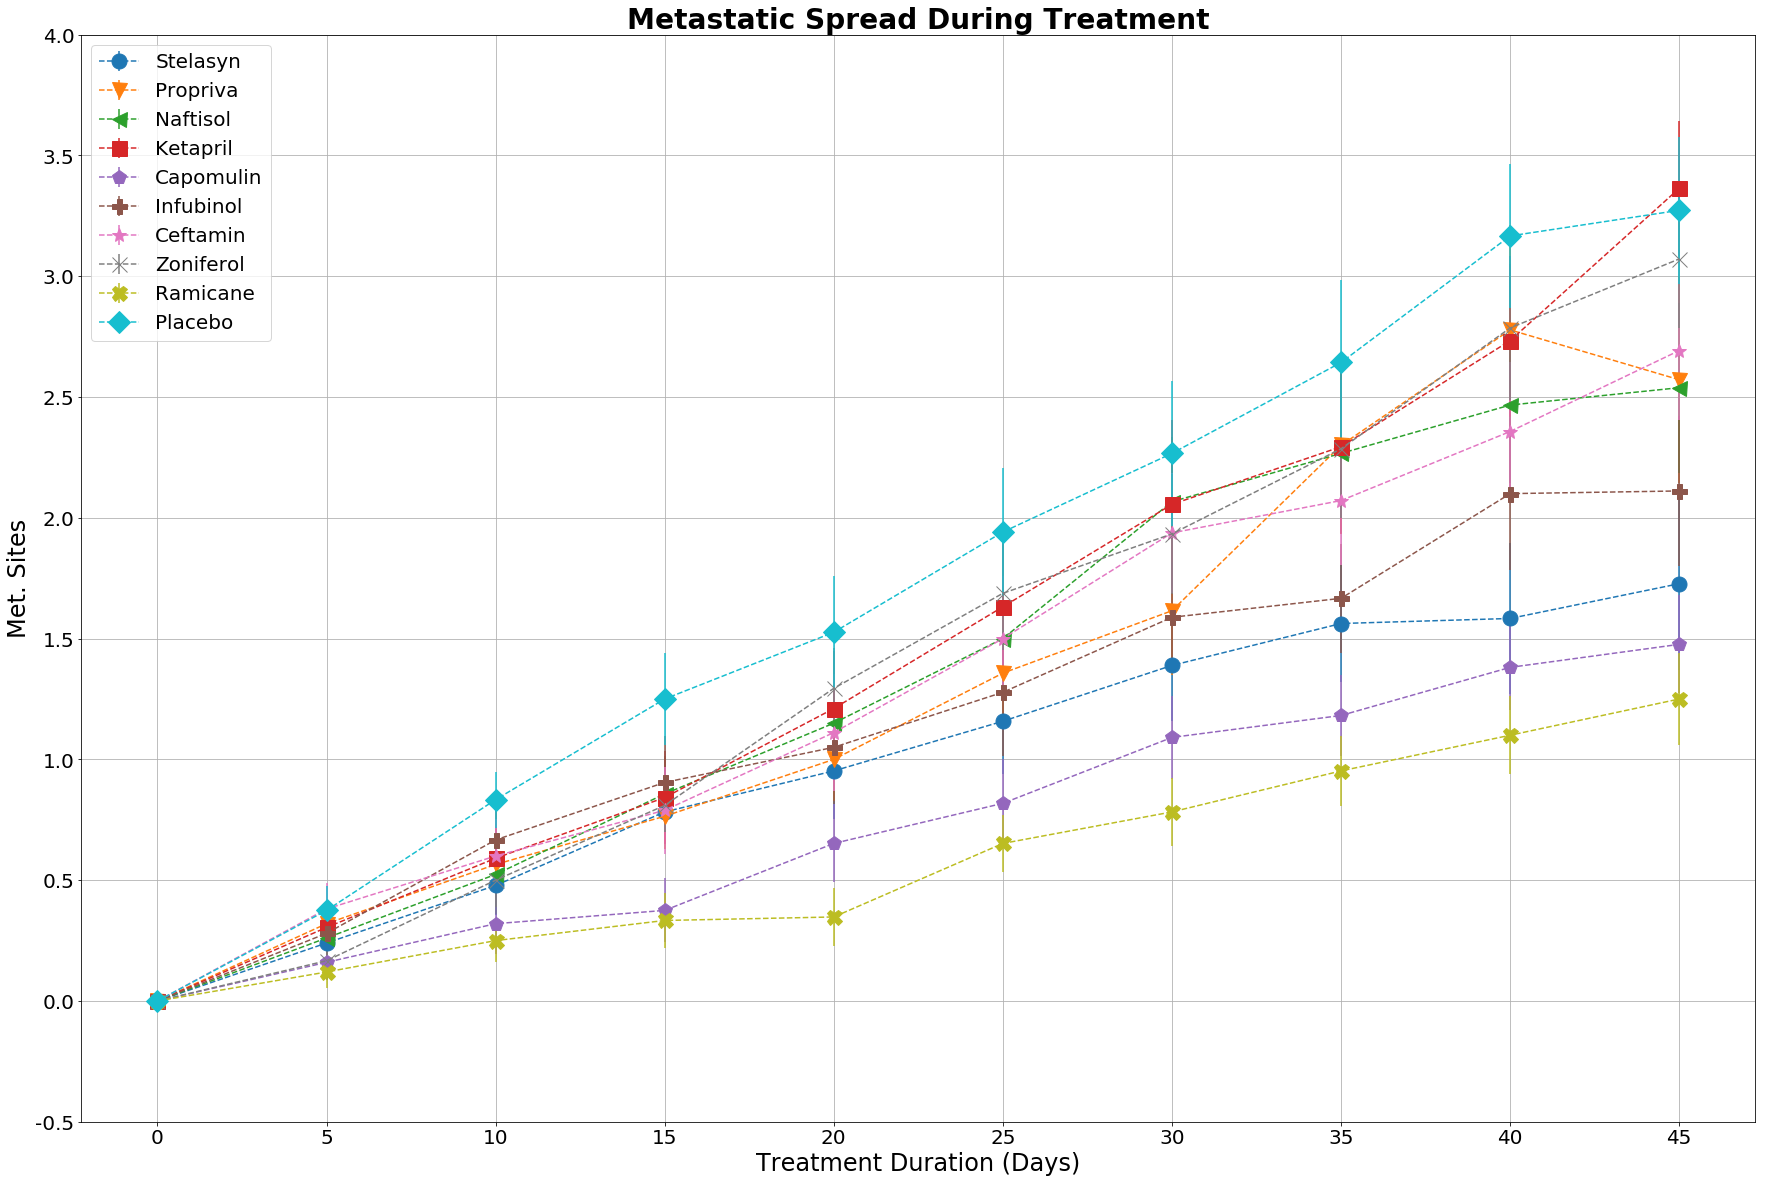

In [14]:
# Generate the Plot (with Error Bars)
labels = {'title': 'Metastatic Spread During Treatment',
          'xlabel': 'Treatment Duration (Days)',
          'ylabel': 'Met. Sites',
         }

plot_clinical_trials(mean_metsite_df, labels, 'Metastatic Sites', stderr_df=stderr_metsite_df)

# Save the Figure
plt.savefig("Images/metsite_results.png")

# Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_data = drug_timepoint_group['Tumor Volume (mm3)'].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count_data)

# Preview DataFrame
mice_count_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                          25
          5                          25
          10                         25
          15                         24
          20                         23

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.unstack(level=0)

# Preview the Data Frame
mice_count_df.head()

Tumor Volume (mm3)                                               \
Drug               Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                   
0                         25       25        25       25       25      25   
5                         25       21        25       23       23      24   
10                        25       20        21       22       21      24   
15                        24       19        21       19       21      20   
20                        23       18        20       19       20      19   

                                                
Drug      Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                       
0               26       25       26        25  
5               25       25       25        24  
10              23       24       23        22  
15              17       24       23        21  
20              17       23       21        17

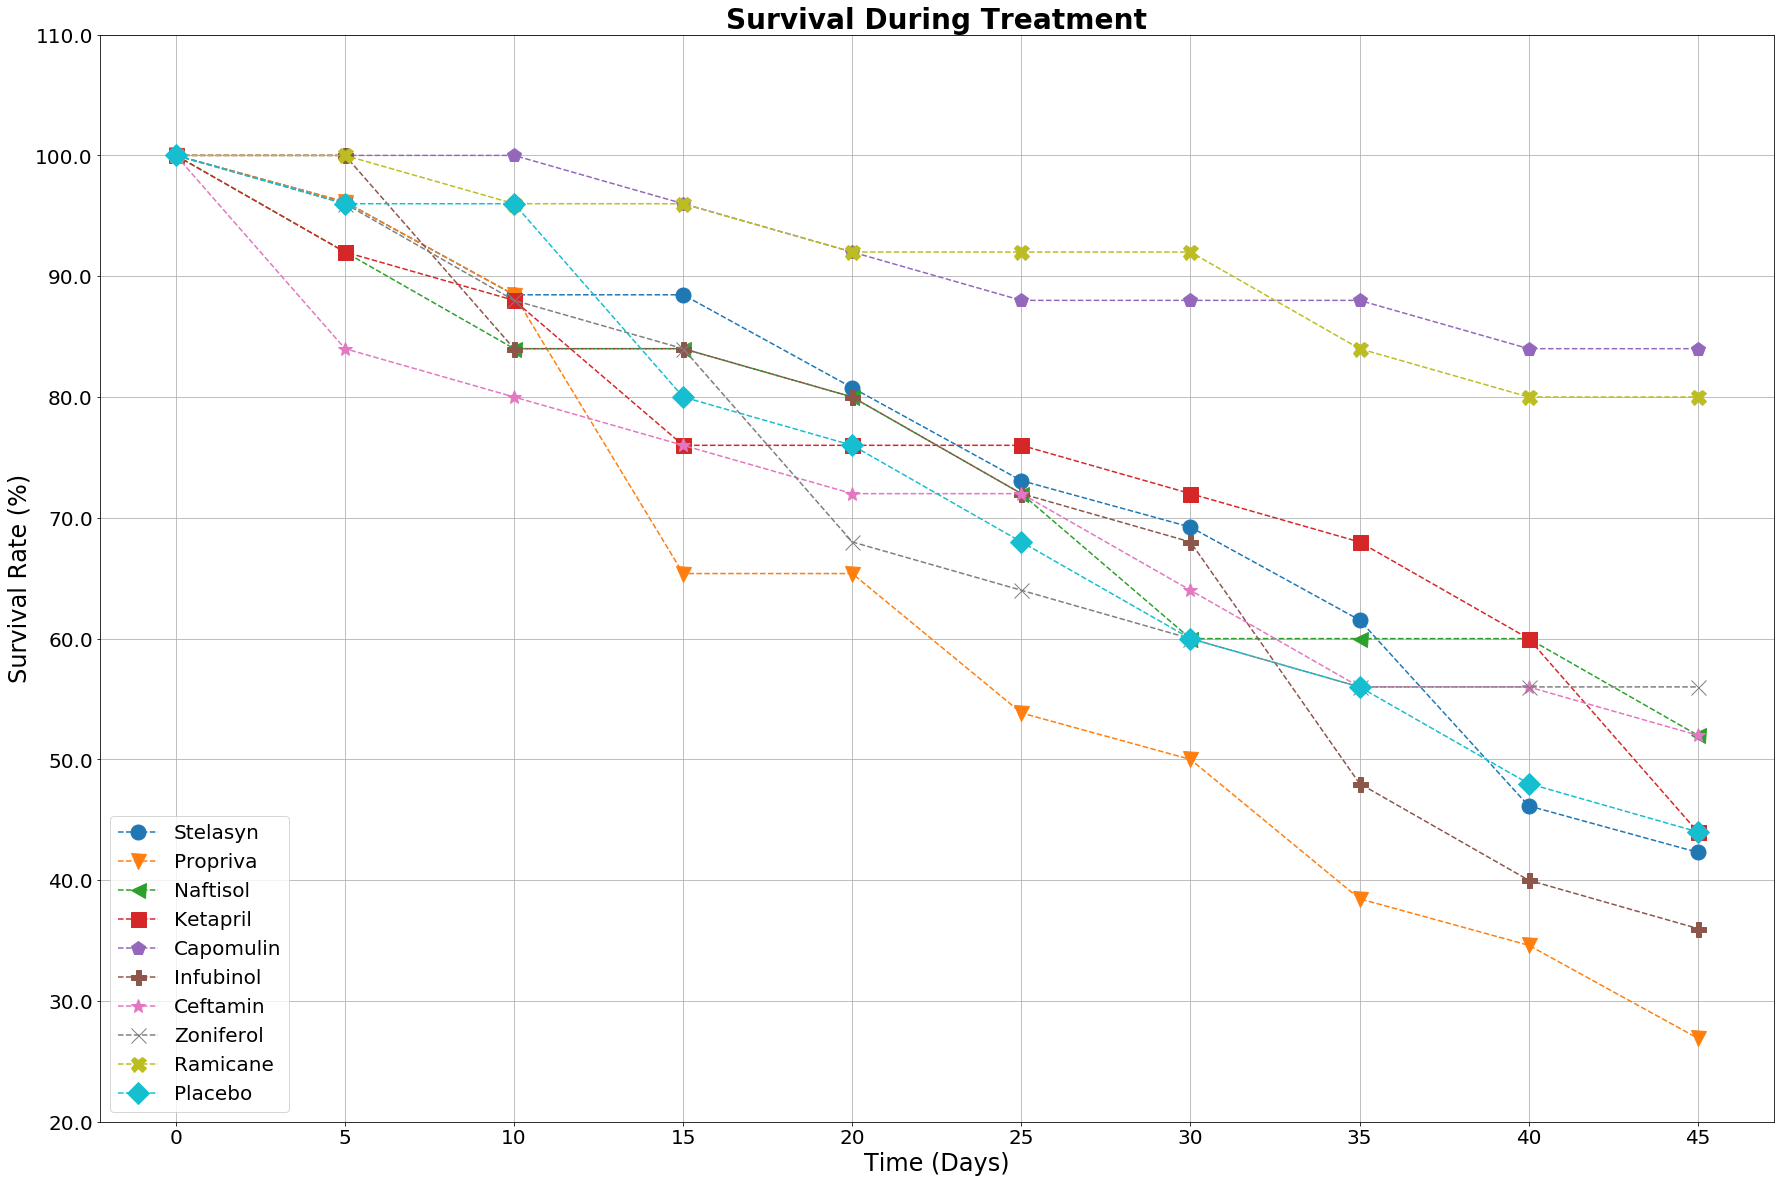

In [17]:
# Generate the Plot (Accounting for percentages)
mice_percent_df = (mice_count_df/mice_count_df.max()) * 100
labels = {'title': 'Survival During Treatment',
          'xlabel': 'Time (Days)',
          'ylabel': 'Survival Rate (%)',
         }

plot_clinical_trials(mice_percent_df, labels, 'Tumor Volume (mm3)', err=False)
plt.legend(loc='lower left', fontsize=20)

# Save the Figure
plt.savefig("Images/mice_count.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
### ((final - initial) / initial) * 100
drug_percent_change = ((mean_tumor_vol_df.iloc[len(mean_tumor_vol_df)-1,:] - \
                         mean_tumor_vol_df.iloc[0,:]) / mean_tumor_vol_df.iloc[0,:]) \
                          * 100

# Unstack 'drug_percent_change'
drug_percent_change = drug_percent_change.unstack()

# Convert to a DataFrame
drugs = drug_percent_change.columns.tolist()
drug_percent_change_df = pd.DataFrame(drug_percent_change.values[0].tolist(), \
                                      index=drugs, columns=['Tumor Volume (mm3)'])

# Sort the DataFrame by 'Tumor Volume (mm3)' in ascending order
drug_percent_change_sorted = drug_percent_change_df.sort_values(by='Tumor Volume (mm3)')

# Display the data
drug_percent_change_sorted

,Tumor Volume (mm3)
Ramicane,-22.320900
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Zoniferol,46.579751
Propriva,47.241175
Placebo,51.297960
Stelasyn,52.085134
Naftisol,53.923347
Ketapril,57.028795


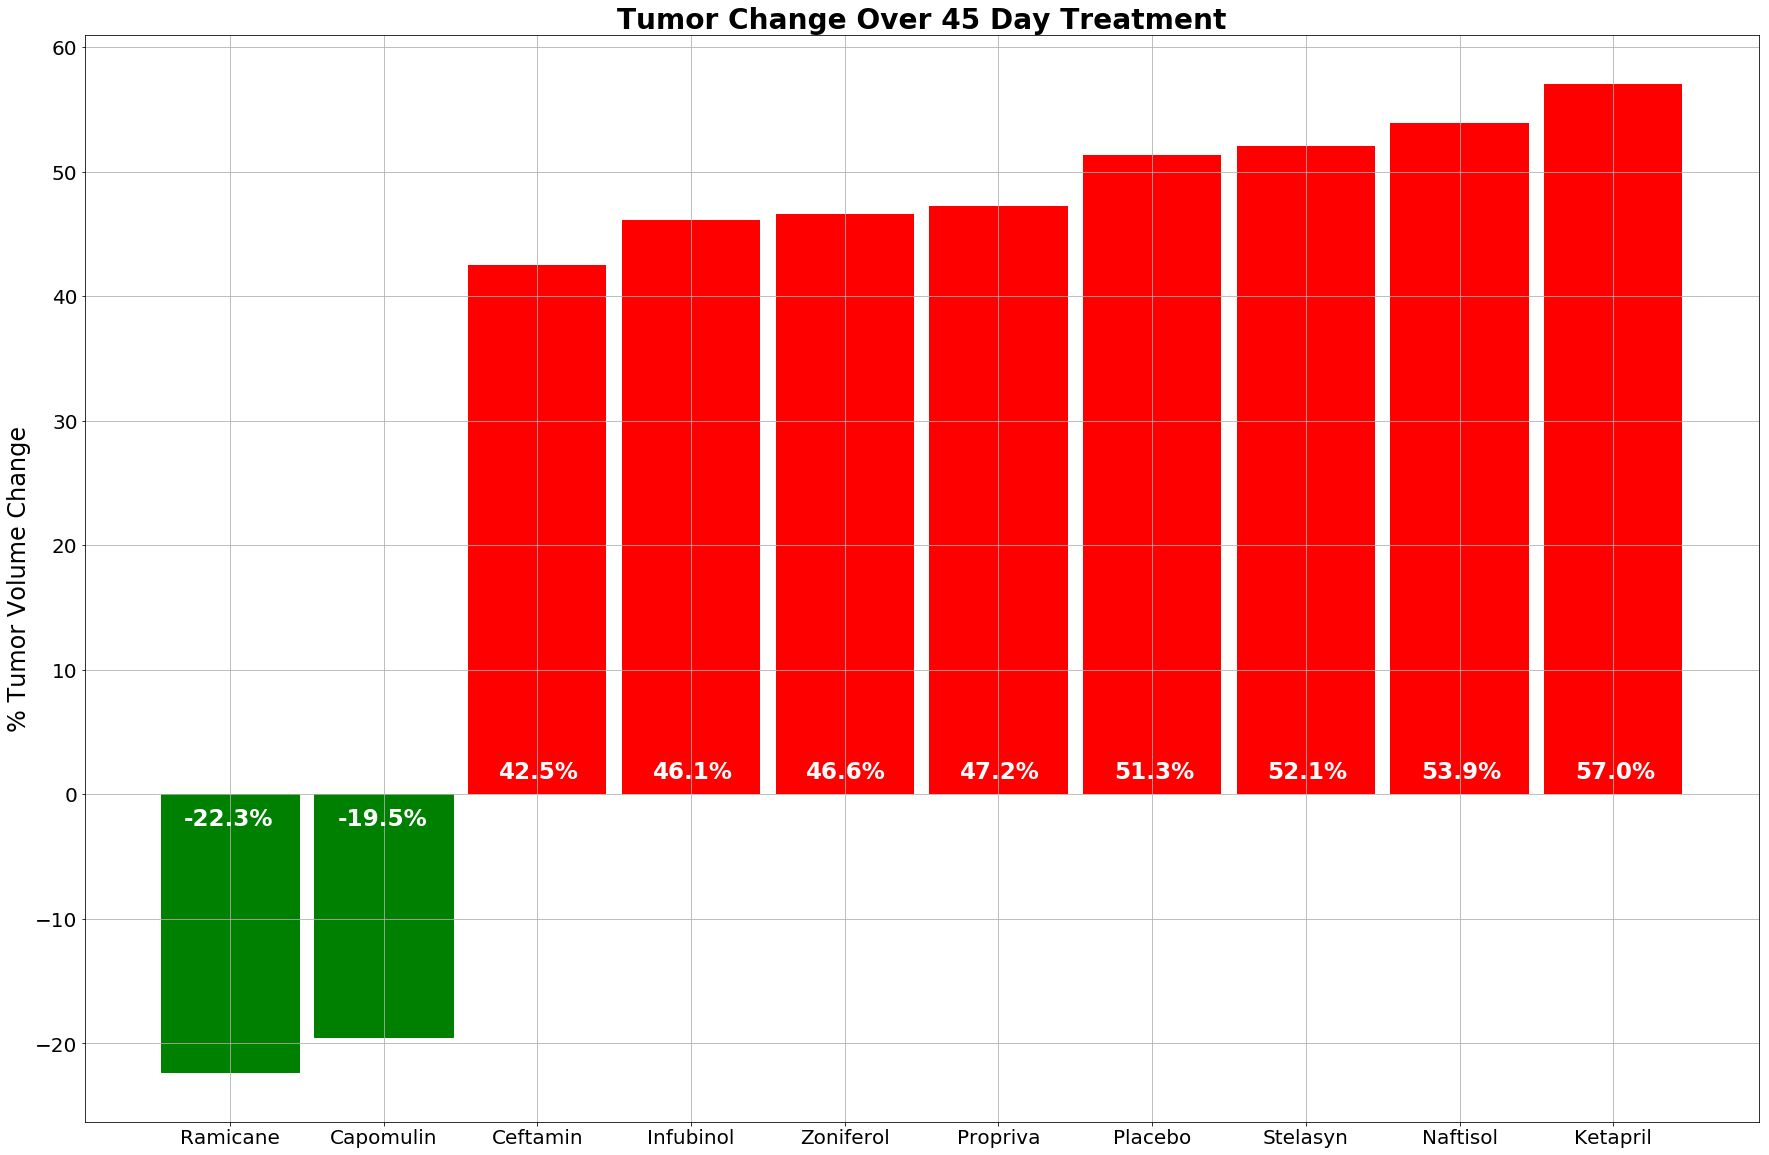

In [19]:
# Setup the x_axis, x_label, and bar height
x_label = drug_percent_change_sorted.index.tolist()
y_height = drug_percent_change_sorted['Tumor Volume (mm3)'].tolist()

# Create a bar chart of the data
fig, ax = plt.subplots()
bars=ax.bar(x_label, y_height, width=0.9, align='center', color='r')

# The first two bars show positive response to treatment
### Change their bar color to green
bars[0].set_color('g')
bars[1].set_color('g')

# Enlarge tick label fontsize
ax.tick_params(labelsize=20)

# Add labels and a title
ax.set_title('Tumor Change Over 45 Day Treatment', fontweight='bold', \
         fontsize=28)
ax.set_ylabel('% Tumor Volume Change', fontsize=24)

# Label the bars with percentenage of changes
for info in bars.patches:
    percent = round(info.get_height(),1)
    
    # Change the location of the label based on 
    # positive or negative percent change
    if  percent < 0:
        xy = (info.get_x()+0.15, -2.5)
    else:
        xy = (info.get_x()+0.2, 1.25)
        
    ax.annotate('{}%'.format(percent), xy=xy, fontsize=23, color='white', \
                fontweight='bold')

# Turn grid on 
plt.grid()

# Save the Figure
plt.savefig("Images/percent_tumor_change.png")

# Show the Figure
fig.show()